In [375]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Tue Jul 24 13:41:37 2018

@author: Craig Russell
Generates Airy Disk plots for resolution criterons
"""


import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import scipy.special
import sklearn

from matplotlib import cm
from matplotlib import rc
import matplotlib

matplotlib.rc('pdf', fonttype=42)

start = -10
end = 10
resolution = 512

x=y= np.linspace(start,end,num=resolution)
xx,yy = np.meshgrid(x,y)

rr = np.sqrt(xx**2+yy**2)
tt = np.arctan2(y,x)

airy = 2*np.divide(scipy.special.jve(1,rr),rr)
print(plt.style.available)
plt.style.use('default')

['_classic_test', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2']


Rayleigh distance is zeroth order ditance apart

In [376]:
zeroth_order = 3.8317
rayleigh_left = 2*np.divide(scipy.special.jve(1,np.sqrt((xx-zeroth_order/2)**2+yy**2)),np.sqrt((xx-zeroth_order/2)**2+yy**2))
rayleigh_right = 2*np.divide(scipy.special.jve(1,np.sqrt((xx+zeroth_order/2)**2+yy**2)),np.sqrt((xx+zeroth_order/2)**2+yy**2))

Sparrow distance is FHWM ditance apart

In [377]:
fwhm_j1 = 1.61633
fwhm_j1 = 2.5838
fwhm_j1 = 1.61633*2
sparrow_left = 2*np.divide(scipy.special.jve(1,np.sqrt((xx-fwhm_j1/2)**2+yy**2)),np.sqrt((xx-fwhm_j1/2)**2+yy**2))
sparrow_right = 2*np.divide(scipy.special.jve(1,np.sqrt((xx+fwhm_j1/2)**2+yy**2)),np.sqrt((xx+fwhm_j1/2)**2+yy**2))


#norm_airy = sklearn.preprocessing.normalize(airy)

Too close

In [378]:
too_close_left = 2*np.divide(scipy.special.jve(1,np.sqrt((xx-fwhm_j1/3)**2+yy**2)),np.sqrt((xx-fwhm_j1/3)**2+yy**2))
too_close_right = 2*np.divide(scipy.special.jve(1,np.sqrt((xx+fwhm_j1/3)**2+yy**2)),np.sqrt((xx+fwhm_j1/3)**2+yy**2))


#norm_airy = sklearn.preprocessing.normalize(airy)

In [617]:
#plt.imshow(airy)



colors = cm.viridis(airy)

fig = plt.figure(dpi=150)
fig.set_size_inches(6,6/1.618)
plt.tight_layout()
#fig.tight_layout()


#plt.rc('text', usetex=True)
#plt.rc('font', family='serif')
#pgf_with_rc_fonts = {"pgf.texsystem": "pdflatex"}
#matplotlib.rcParams.update(pgf_with_rc_fonts)

ax = fig.add_subplot(111, projection='3d')
ax.set_xlim3d([start, end])
ax.set_ylim3d([start, end])
ax.set_zlim3d([-0.08, 1])
ax.set_xticks(np.linspace(10,-10, 5));
ax.set_yticks(np.linspace(10,-10, 5));

# Plot a basic wireframe.
#ax.plot_wireframe(xx, yy, airy, rstride=10, cstride=10)

#surf = ax.plot_surface(xx, yy, airy, rcount=50, ccount=50,
#                       facecolors=colors, shade=False)

Plotting E field

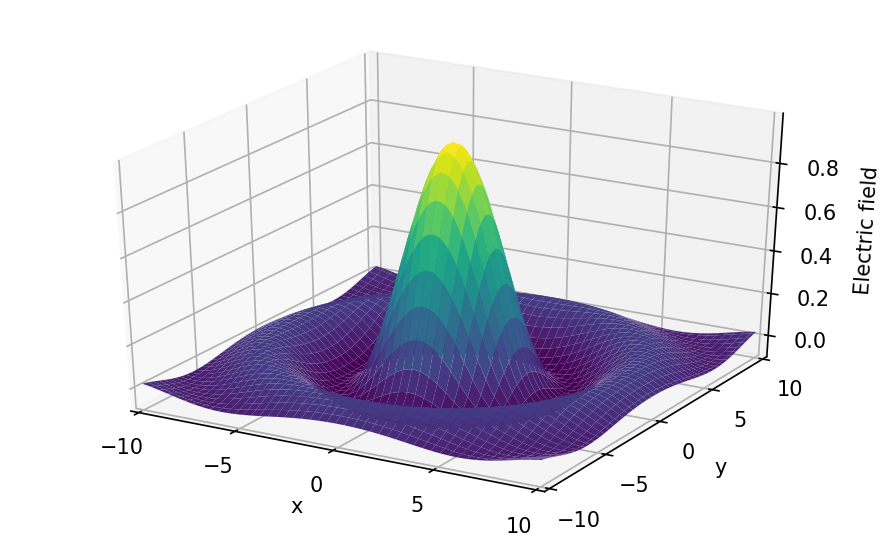

In [618]:
surf = ax.plot_surface(xx, yy, airy, cmap=cm.viridis)
#surf.set_facecolor((0,0,0,0))
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('Electric field')
plt.tight_layout()


plt.savefig("airy_E_fill.pdf", bbox_inches='tight')
#plt.show()
fig

Plotting I field 

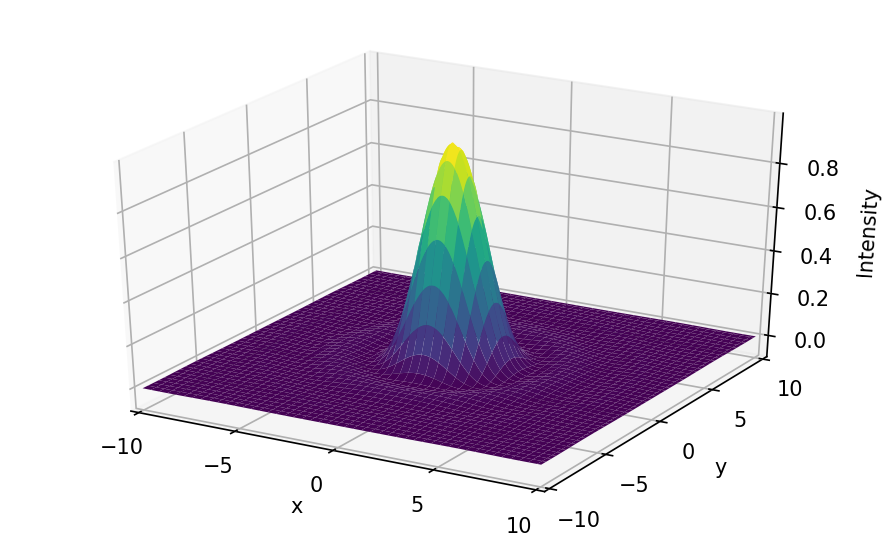

In [619]:
#plt.show()
#%%
#plt.cla()
surf.remove()
surf = ax.plot_surface(xx, yy, airy**2, cmap=cm.viridis)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('Intensity')
plt.savefig("airy_I_fill.pdf")
fig

Plotting Rayeligh criteron

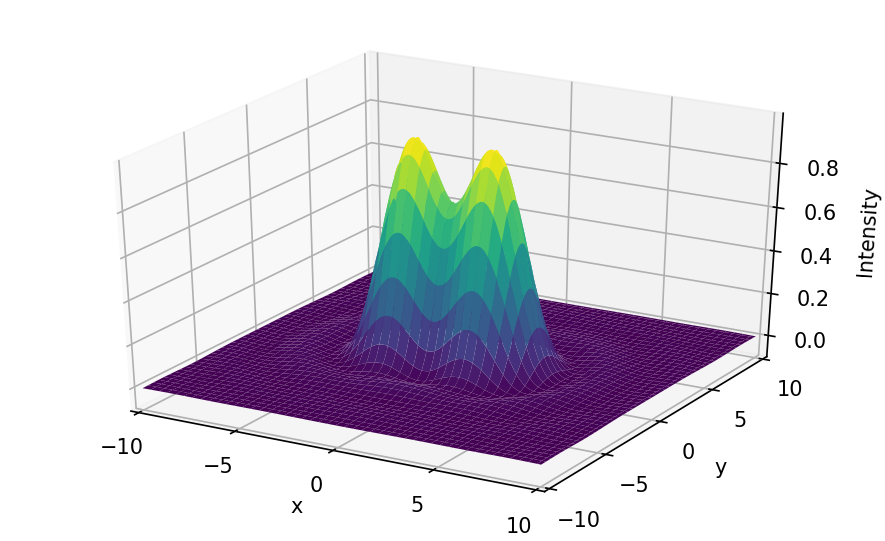

In [620]:
surf.remove()
surf = ax.plot_surface(xx, yy, rayleigh_left**2+rayleigh_right**2, cmap=cm.viridis)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('Intensity')
plt.savefig("airy_rayleigh.pdf")
fig

Plotting sparrow criteron

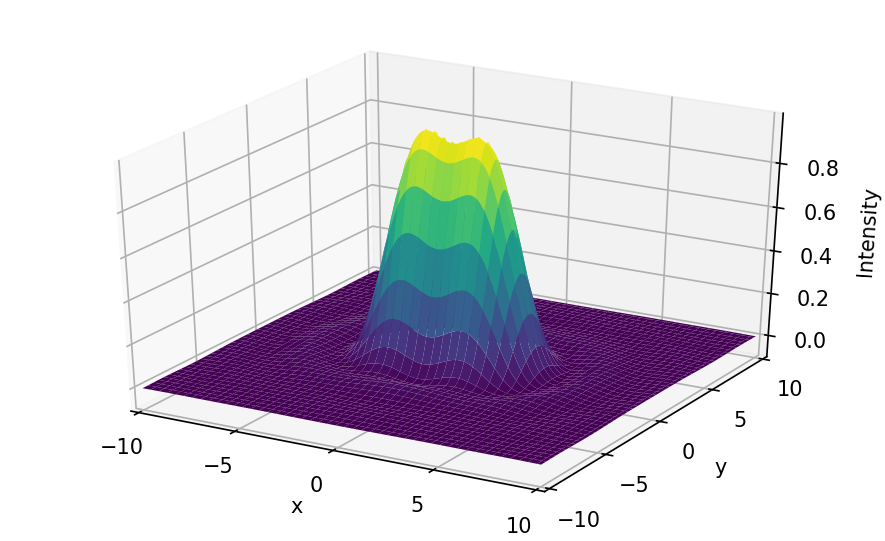

In [621]:
surf.remove()
surf = ax.plot_surface(xx, yy, (sparrow_left**2+sparrow_right**2), cmap=cm.viridis)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('Intensity')
plt.savefig("airy_sparrow.pdf")
fig

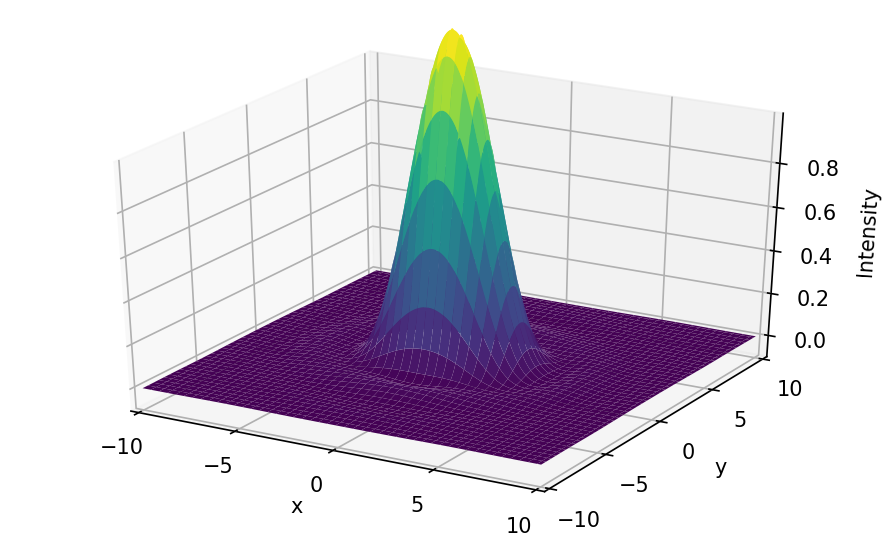

In [622]:
surf.remove()
surf = ax.plot_surface(xx, yy, (too_close_left**2+too_close_right**2), cmap=cm.viridis)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('Intensity')
plt.savefig("airy_too_close.pdf")
fig

In [628]:
fig1 = plt.figure(figsize=(3,6/1.618))

#fig1.set_size_inches(6,6/1.618)
# ax0 = fig.add_subplot(111, projection='3d')
# ax1 = fig.add_subplot(111, projection='3d')
# ax2 = fig.add_subplot(111, projection='3d')

# fig, ax = plt.subplots(2, 3)
# fig1, axes = plt.subplots(3, 4, sharex=True, sharey=True)

ax0= fig1.add_subplot(311, projection='3d')
ax0.set_xlabel('x');ax0.set_ylabel('y');ax0.set_zlabel('Intensity')
ax0.plot_surface(xx, yy, rayleigh_left**2+rayleigh_right**2, cmap=cm.viridis)
ax1 = fig1.add_subplot(312, projection='3d')
ax1.set_xlabel('x');ax1.set_ylabel('y');ax1.set_zlabel('Intensity')
ax1.plot_surface(xx, yy, (sparrow_left**2+sparrow_right**2), cmap=cm.viridis)
ax2 = fig1.add_subplot(313, projection='3d')
ax2.set_xlabel('x');ax2.set_ylabel('y');ax2.set_zlabel('Intensity')
ax2.plot_surface(xx, yy, (too_close_left**2+too_close_right**2), cmap=cm.viridis)
plt.tight_layout()
plt.autoscale()
#plt.show()

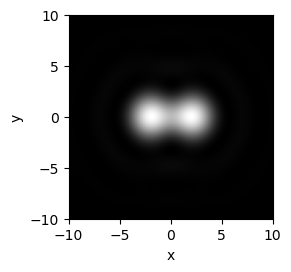

In [627]:
import scipy
matplotlib.rc('pdf', fonttype=42)

fig1 = plt.figure(figsize=(3,3))
plt.xlabel('x')
plt.ylabel('y')
rayeleigh_image = rayleigh_left**2+rayleigh_right**2
plt.imshow(rayleigh_left**2+rayleigh_right**2,aspect=1,cmap='gray',extent=[-10,10,-10,10])
ax = plt.gca()
ax.set_xticks(np.linspace(10,-10, 5));
ax.set_yticks(np.linspace(10,-10, 5));
#plt.show()
plt.tight_layout()
plt.savefig("./sampling/digital_airy_sample_raw.pdf",bbinch='tight')
plt.savefig("./sampling/digital_airy_sample_raw.png")
plt.show()
# fig1

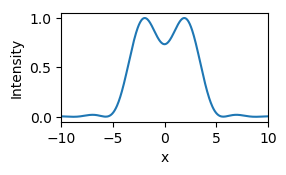

In [655]:
figure_airy_plot = plt.figure(figsize=(3,3/1.618),frameon=True)
plt.plot(xx[round((rayleigh_left[0].size)/2)],
         (rayleigh_left**2+rayleigh_right**2)[round((rayleigh_left[0].size)/2)]
        )
ax = plt.gca()
ax.set_xticks(np.linspace(10,-10, 5));
plt.xlim([-10,10])
plt.ylabel('Intensity')
plt.xlabel('x')
plt.tight_layout()
plt.savefig('./sampling/digital_airy_sample_plot.pdf')
plt.savefig('./sampling/digital_airy_sample_plot.png')
plt.show()

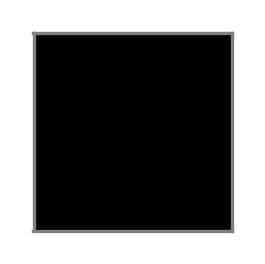

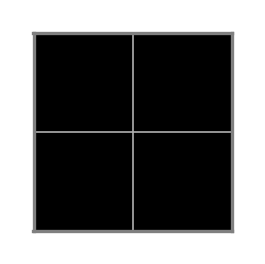

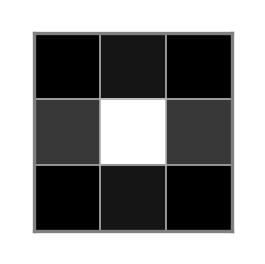

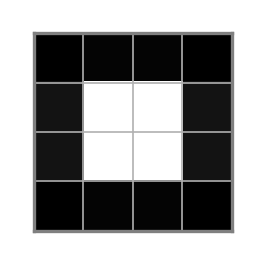

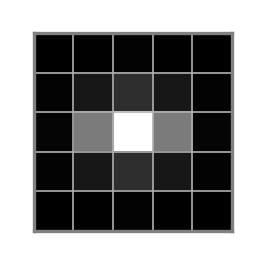

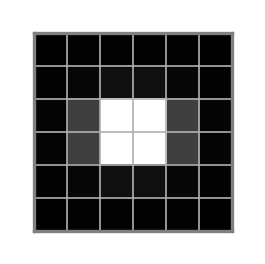

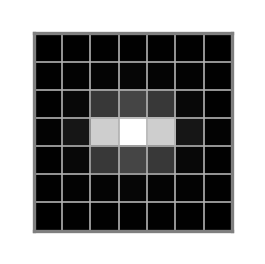

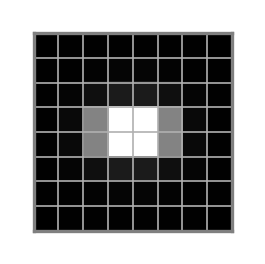

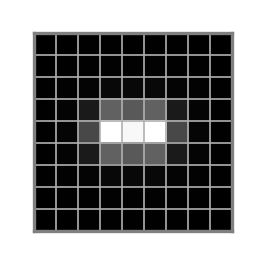

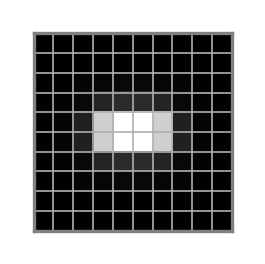

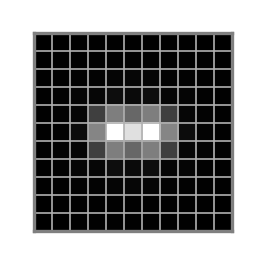

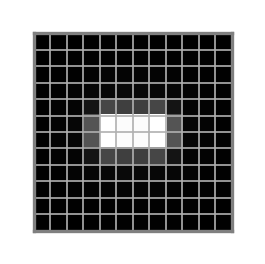

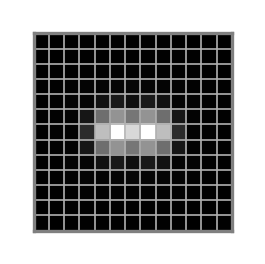

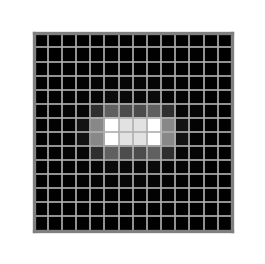

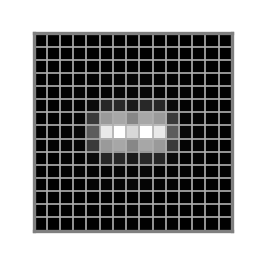

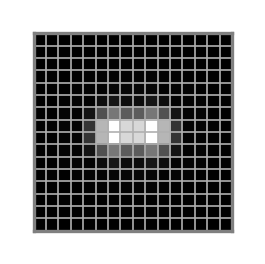

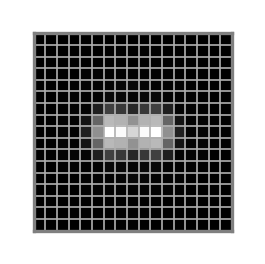

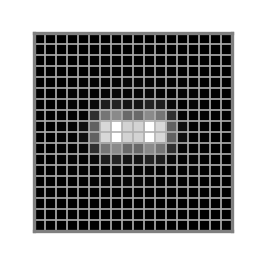

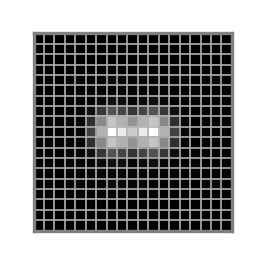

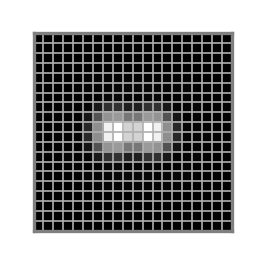

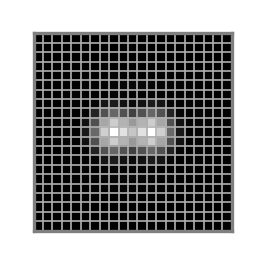

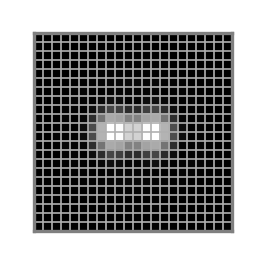

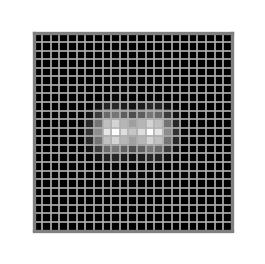

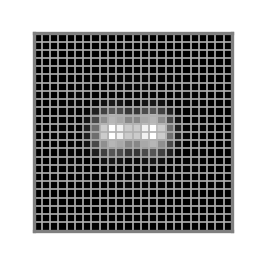

In [648]:
import matplotlib.ticker as plticker

dpi = 300
# pixels_across = 11

for pixels_across in np.arange(1,25):
    image = scipy.misc.imresize(rayeleigh_image,(pixels_across,pixels_across))


    image_size = 256
    fig=plt.figure(figsize=(float(image_size)/dpi,float(image_size)/dpi),dpi=dpi,frameon=True,edgecolor='gray')
    ax=fig.add_subplot(111)
    # fig.subplots_adjust(left=0,right=1,bottom=0,top=1)

    ax.matshow(image,cmap='gray',aspect='auto')

    myInterval=1
    #plticker.set_useOffset(0.5)
    loc = plticker.MultipleLocator(base=myInterval)
    ax.xaxis.set_major_locator(loc)
    ax.yaxis.set_major_locator(loc)

    # ax=plt.gca()

    ax.set_xticks([x-0.5 for x in range(1,pixels_across)],minor=False )
    ax.set_yticks([y-0.5 for y in range(1,pixels_across)],minor=False)

    plt.grid(which="minor",ls="-",lw=2)

    ax.grid(which='major',axis='both', linestyle='-', linewidth=0.4)

    ax.set_yticklabels([])
    ax.set_xticklabels([])

    ax.spines['bottom'].set_color('gray')
    ax.spines['top'].set_color('gray')
    ax.spines['left'].set_color('gray')
    ax.spines['right'].set_color('gray')

    nx=abs(int(float(ax.get_xlim()[1]-ax.get_xlim()[0])/float(myInterval)))
    ny=abs(int(float(ax.get_ylim()[1]-ax.get_ylim()[0])/float(myInterval)))

    plt.tick_params(
        axis='both',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom=False,      # ticks along the bottom edge are off
        top=False,         # ticks along the top edge are off
        left=False,
        right=False,
        labelbottom=False) # labels along the bottom edge are off
    plt.savefig("./sampling/digital_airy_sample_" + str(pixels_across) + ".pdf")
    plt.savefig("./sampling/digital_airy_sample_" + str(pixels_across) + ".png")
    plt.show()
